# 4.1

In [ ]:
n = 100
p = 5
beta_0 = 1 #wartosc interceptu i odpowiada ona pstwu ze wartosc y=0
beta_1 = [2,3,0.5,0.001,0] #exp(beta_1) - szanse na 1 (1 ma exp(beta_0) razy wiecej) szans ze wystapi niz 0
pi=[]

In [ ]:
import numpy as np

In [ ]:
X = np.random.normal(0,1, size = (n,p))

In [ ]:
X

array([[ 0.16774975, -0.15581378, -2.23651881,  2.60032804,  0.88201639],
       [ 0.35033912,  0.25070262,  2.17757506, -0.98540802,  1.14826532],
       [-0.41493397,  0.63868156,  0.01628758, -1.93969261,  0.13886051],
       [-0.27819104,  0.26687113,  0.9437318 ,  1.15270877, -0.11409495],
       [ 0.6195913 , -1.37280667, -0.15795509,  0.84090723, -1.15149338],
       [-0.33094961,  0.27152925, -0.98464066, -0.53260328, -0.14514477],
       [ 0.42159196,  0.75580432,  1.33088057,  0.42580593, -2.73454328],
       [-1.32966649, -0.34648526, -0.20342529, -0.18207362, -2.23376945],
       [ 0.76659972, -0.85320622, -0.36392314, -1.51796555, -0.93518627],
       [ 0.32044736,  0.64607121,  0.60454211, -0.74765971,  0.04355586],
       [-0.7856007 , -0.41502167,  0.76287796, -0.29821532,  0.34934805],
       [-0.18260183, -0.30344231,  1.0388948 ,  0.79603431, -0.46326193],
       [-0.68843921, -0.18541968,  0.16090819,  1.77747967, -1.3100583 ],
       [ 0.07809171,  0.91371477, -0.2

In [ ]:
Xbeta = X@beta_1 + beta_0
probs = np.exp(Xbeta)/(1+np.exp(Xbeta))
y = np.random.binomial(1,probs)
y

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

##a

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
a = LogisticRegression(random_state = 123).fit(X,y)

In [ ]:
a.coef_ #odpowiada wartości beta1 (wagi cech)

array([[ 0.90488398,  2.02324425,  0.34231231, -0.12523947, -0.16885705]])

In [ ]:
a.intercept_ #odpowiada wartosci Beta0

array([1.05215921])

##b

In [ ]:
# c = [10,2,1,0.2,0.2,0.01,0.005]
# coefy = []
# intercepty = []

In [ ]:
c = np.array([10,2,1,0.2,0.2,0.01,0.005]) # wraz ze spadkiem c (wiec wzrostem lambda) zmniejszamy wagi, które przypisujemy cechą, zapobiega di overfittingu
coefy = []
intercepty = []

In [ ]:
for i in c:
  b = LogisticRegression(random_state = 123, penalty = "l2", C = i).fit(X,y)
  print(i, ":", b.coef_[0], b.intercept_[0])
  coefy.append(b.coef_[0])
  intercepty.append(b.intercept_)

10.0 : [ 1.22394489  2.49903591  0.46442019 -0.14625506 -0.17951756] 1.2632762904383037
2.0 : [ 1.04453936  2.23564215  0.39579952 -0.13498691 -0.17505306] 1.1454366468865733
1.0 : [ 0.90488398  2.02324425  0.34231231 -0.12523947 -0.16885705] 1.0521592068588979
0.2 : [ 0.51162052  1.35367855  0.19127888 -0.08806907 -0.13091858] 0.7715824611093741
0.2 : [ 0.51162052  1.35367855  0.19127888 -0.08806907 -0.13091858] 0.7715824611093741
0.01 : [ 0.06873969  0.25742378  0.01855999 -0.00983847 -0.02502891] 0.41287485997263107
0.005 : [ 0.03680039  0.14331944  0.00878562 -0.00460659 -0.01362646] 0.38912876239384103


In [ ]:
# for i in c:
#   b = LogisticRegression(random_state = 123, penalty = "l2", C = i).fit(X,y)
#   print(i, ":", b.coef_, b.intercept_)
#   coefy.append(b.coef_)
#   intercepty.append(b.intercept_)

10 : [[ 1.22394489  2.49903591  0.46442019 -0.14625506 -0.17951756]] [1.26327629]
2 : [[ 1.04453936  2.23564215  0.39579952 -0.13498691 -0.17505306]] [1.14543665]
1 : [[ 0.90488398  2.02324425  0.34231231 -0.12523947 -0.16885705]] [1.05215921]
0.2 : [[ 0.51162052  1.35367855  0.19127888 -0.08806907 -0.13091858]] [0.77158246]
0.2 : [[ 0.51162052  1.35367855  0.19127888 -0.08806907 -0.13091858]] [0.77158246]
0.01 : [[ 0.06873969  0.25742378  0.01855999 -0.00983847 -0.02502891]] [0.41287486]
0.005 : [[ 0.03680039  0.14331944  0.00878562 -0.00460659 -0.01362646]] [0.38912876]


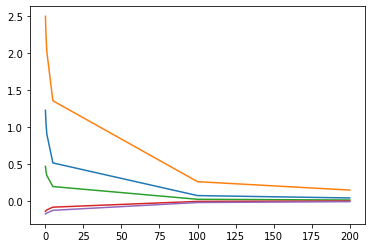

In [ ]:
import matplotlib.pyplot as plt
plt.plot(1/c, np.array(coefy))

In [ ]:
np.array(coefy)

array([[[ 1.22394489,  2.49903591,  0.46442019, -0.14625506,
         -0.17951756]],

       [[ 1.04453936,  2.23564215,  0.39579952, -0.13498691,
         -0.17505306]],

       [[ 0.90488398,  2.02324425,  0.34231231, -0.12523947,
         -0.16885705]],

       [[ 0.51162052,  1.35367855,  0.19127888, -0.08806907,
         -0.13091858]],

       [[ 0.51162052,  1.35367855,  0.19127888, -0.08806907,
         -0.13091858]],

       [[ 0.06873969,  0.25742378,  0.01855999, -0.00983847,
         -0.02502891]],

       [[ 0.03680039,  0.14331944,  0.00878562, -0.00460659,
         -0.01362646]]])

In [ ]:
1/np.array(c)

array([1.e-01, 5.e-01, 1.e+00, 5.e+00, 5.e+00, 1.e+02, 2.e+02])

## d 

In [ ]:
coefy_z =np.array([])
coefy_l1 = np.array([])
coefy_l2 = np.array([])
in_z = np.array([])
in_l1 = np.array([])
in_l2 = np.array([])
beta_k_z = np.array([])
beta_k_l1 = np.array([])
for i in range(1000):
  zwykle = LogisticRegression(random_state=123).fit(X,y)
  l1 = LogisticRegression(random_state=123, penalty ='l2').fit(X,y)
  l2 = LogisticRegression(random_state=123, penalty = 'l1').fit(X,y)
  coefy_z.append(zwykle.coef_[0])
  coefy_l1.append(l1.coef_[0])
  coefy_l2.append(l2.coef_[0])
  in_z.append(zwykle.intercept_[0])
  in_l1(l1.intercept_[0])
  in_l2(l2.intercept_[0])
  beta_k_z.append()

In [ ]:
a = np.array([1,2,3])
b = np.array([3,4,5])
np.sum(a-b)

-6

# 4.2

##a

In [ ]:
from google.colab import files 

In [ ]:
uploaded2 = files.upload()

Saving SAheart.csv to SAheart.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2 = pd.read_csv('SAheart.csv')

In [ ]:
df2.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df2_raw = np.array(df2)

In [ ]:
X, y = df2_raw[:,:-1], df2_raw[:,-1]

In [ ]:
X[:,4] = LabelEncoder().fit_transform(X[:,4])
y = LabelEncoder().fit_transform(y)

In [ ]:
model = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear').fit(X,y)

<Figure size 864x864 with 0 Axes>

##b

In [ ]:
#siatka parametrów 
#STRATIFIEDKFOLD KTORY JEST DOMYSLNYM CV ma default = 5
print('optymalne C', model.C_)
print('siatka Cs', model.Cs_)
print('wspolczynniki wybarengo modelu', model.coef_)
print('współczynniki dla konkretnych wartości Cs w konkretnych iteracjach pętli kroswalidacyjnej', model.coefs_paths_)

optymalne C [21.5443469]
siatka Cs [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
wspolczynniki wybarengo modelu [[ 6.28495128e-03  7.93322505e-02  1.73440028e-01  1.95577283e-02
   9.22157298e-01  3.90773397e-02 -6.49337987e-02  1.16048957e-04
   4.48541350e-02]]
współczynniki dla konkretnych wartości Cs w konkretnych iteracjach pętli kroswalidacyjnej {1: array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-3.26510314e-03,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-1.19009758e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -7.38857344e-03,


# Jeszcze raz 4.1

generowanie danych

In [ ]:
n = 100
p = 5
beta_0 = 1
beta_1 = [2, 1, 0.5, 0.01, 0]

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# x z rozkladu normalnego bedacy wektorem o wymiarze 5 
x = np.random.normal(0,1,[n,p])

In [ ]:
x[1]

array([1.63827026, 0.23353954, 0.6266452 , 0.04630261, 2.13282581])

In [ ]:
p_y = np.exp(beta_0 + x@beta_1)/(1+np.exp(beta_0 + x@beta_1))

In [ ]:
y = np.random.binomial(1, p_y)

## a

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(penalty = 'none').fit(x,y)

In [ ]:
print('intercept:', model1.intercept_,'\n', 'coef:', model1.coef_)

intercept: [0.79240905] 
 coef: [[1.96583919 0.63290994 0.5898888  0.10519756 0.07030428]]


## b

**Regularyzacja - im wieksza alfa tym bardziej zapobiegamy przerewnowaniu modelu**

Teraz posłużymy się karą l2 <- zmniejsza wagi ale nie elminuje zadnej z cech

> 

Dodatkowo będziemy manewrować wartością C - odpowiada ona 1/alfa - wraz ze spadkiem C (wzrostem alfa) będziemy obcinać wagi coraz mocniej, bo funkcja kosztu ma człon alfa*1/2*sum(waga i-tej cechy)

In [ ]:
C = np.array([10, 2, 1, 0.2, 0.1, 0.01, 0.005])
wspolczynniki = []
for i in C:
  model1_2 = LogisticRegression(penalty = 'l2', C = i).fit(x,y)
  print('alfa:', 1/i, '\n', 'intercept:', model1_2.intercept_,'\n', 'coef:', model1_2.coef_)
  wspolczynniki.append(model1_2.coef_[0])

alfa: 0.1 
 intercept: [0.781942] 
 coef: [[1.92826544 0.61684299 0.57813689 0.1000831  0.07065839]]
alfa: 0.5 
 intercept: [0.74710128] 
 coef: [[1.80078811 0.56300456 0.53853545 0.08308514 0.07189924]]
alfa: 1.0 
 intercept: [0.71431062] 
 coef: [[1.67678165 0.51174665 0.50040443 0.06719157 0.07313604]]
alfa: 5.0 
 intercept: [0.59707024] 
 coef: [[1.18240859 0.32194425 0.35164454 0.0133095  0.07691267]]
alfa: 10.0 
 intercept: [0.54507437] 
 coef: [[ 0.91785232  0.23292981  0.27325644 -0.00669     0.07593133]]
alfa: 100.0 
 intercept: [0.45574443] 
 coef: [[ 0.22084821  0.04656562  0.06558107 -0.01453913  0.03571503]]
alfa: 200.0 
 intercept: [0.45048293] 
 coef: [[ 0.12175379  0.02500829  0.03607476 -0.00908951  0.02163593]]


In [ ]:
import matplotlib.pyplot as plt

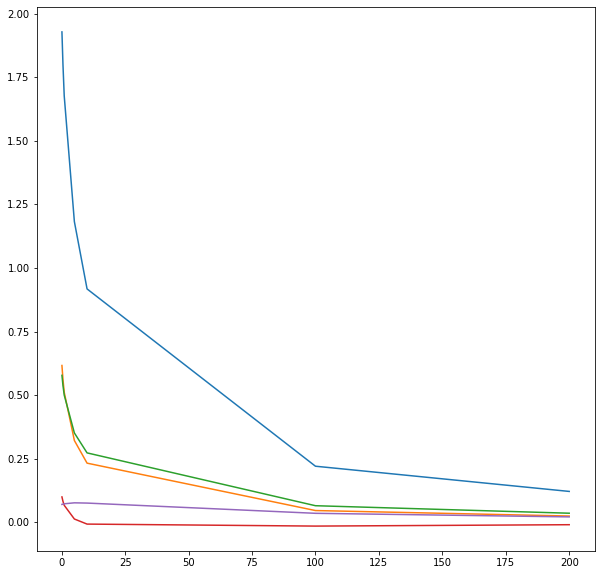

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(1/C, wspolczynniki)
plt.show()

In [ ]:
C = np.array([10, 2, 1, 0.2, 0.1, 0.01, 0.005])
wspolczynnikib = []
for i in C:
  model1_3 = LogisticRegression(penalty = 'l1', C = i, solver = "liblinear").fit(x,y)
  print('alfa:', 1/i, '\n', 'intercept:', model1_3.intercept_,'\n', 'coef:', model1_3.coef_)
  wspolczynnikib.append(model1_3.coef_[0])

alfa: 0.1 
 intercept: [0.83085908] 
 coef: [[ 2.16557248  0.78397956  0.56852715 -0.30290955 -0.04386224]]
alfa: 0.5 
 intercept: [0.76287265] 
 coef: [[ 2.01728816  0.71919675  0.51132801 -0.26043059 -0.0127861 ]]
alfa: 1.0 
 intercept: [0.69024887] 
 coef: [[ 1.86443436  0.64757961  0.4489508  -0.21694763  0.        ]]
alfa: 5.0 
 intercept: [0.34306945] 
 coef: [[ 1.19080526  0.29395839  0.11327902 -0.00326203  0.        ]]
alfa: 10.0 
 intercept: [0.09007504] 
 coef: [[0.80591074 0.04816591 0.         0.         0.        ]]
alfa: 100.0 
 intercept: [0.] 
 coef: [[0. 0. 0. 0. 0.]]
alfa: 200.0 
 intercept: [0.] 
 coef: [[0. 0. 0. 0. 0.]]


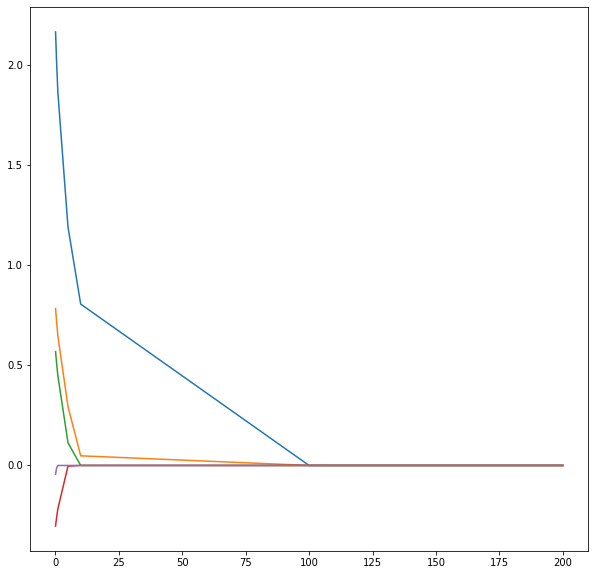

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(1/C, wspolczynnikib)
plt.show()

# 4.2 - lecimy!

In [ ]:
from google.colab import files

In [ ]:
upload2 = files.upload()

Saving SAheart.csv to SAheart.csv


W tym zadaniu będziemy zajmować się regresją logistyczną z crosswalidacja -  tworzy ona siatke k=crosswalidacyjna dzięki czemu można dobrać odpowiednią wartość alfa

## a

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
model2 = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear').fit(x,y)

## b

In [ ]:
print('siatka par C:', model2.Cs_, '\n',
      'coefy dla poszczególnych C w siatce:', model2.coefs_paths_, '\n',
      'najlepsze C:', model2.C_,
      'coefy:', model2.coef_) #mamy 5 cech wiec 5 coefów, te ostatnie to wspolczynniki odpowiadajace najlepszemu C

siatka par C: [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04] 
 coefy dla poszczególnych C w siatce: {1: array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 1.19324409,  0.36314477,  0.25665509, -0.15684986,
          0.        ,  0.5035884 ],
        [ 1.79788752,  0.68120625,  0.53385655, -0.36506726,
         -0.00686005,  0.84488928],
        [ 1.93161262,  0.74255365,  0.5871125 , -0.41062169,
         -0.04452151,  0.91633987],
        [ 1.95054267,  0.75114705,  0.5944478 , -0.41707413,
         -0.0496804 ,  0.92632698],
        [ 1.9

## c

In [ ]:
LogisticRegressionCV(penalty = 'l1', solver = 'liblinear').fit(x,y).scores_

{1: array([[0.4 , 0.4 , 0.4 , 0.4 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ],
        [0.4 , 0.4 , 0.4 , 0.75, 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75],
        [0.35, 0.35, 0.35, 0.65, 0.7 , 0.75, 0.75, 0.75, 0.75, 0.75],
        [0.35, 0.35, 0.35, 0.7 , 0.65, 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ],
        [0.35, 0.35, 0.35, 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 ]])}

In [ ]:
np.mean(LogisticRegressionCV(penalty = 'l1', solver = 'liblinear').fit(x,y).scores_[1],axis = 0)

array([0.37, 0.37, 0.37, 0.66, 0.77, 0.77, 0.76, 0.76, 0.76, 0.76])

In [ ]:
logreg = LogisticRegressionCV(penalty = 'l1',solver='liblinear').fit(x,y)

In [ ]:
#c
means = np.mean(logreg.scores_[1],axis = 0) #uśredniamy po obrotach pętli kroswalidacyjnej accuracy dla poszczególnych wartości z siatki Cs
mean_max = max(means) #znajdujemy największą z tych średnich
stds = np.std(logreg.scores_[1],axis = 0) #liczymy odchylenia standardowe po obrotach pętli kroswalidacyjnej 
                                          #dla poszczególnych wartości z siatki Cs
std_of_mean_max = np.unique(stds[means==max(means)]) #liczymy odchylenie standardowe po obrotach pętli kroswalidacyjnej 
                                          #dla tego parametru z Cs gdzie średnia była największa
Cs_min = min(logreg.Cs_[means>=mean_max-std_of_mean_max]) #znajdujemy najmniejszą wartość z Cs której średnia mieści się w pasie 
                                                          #od średnia maksymalna - odchylenie standardowe tego elementu Cs
                                                          #dla którego ta średnią mieliśmy

                                                          #oczywiście w tym pasie mogą być średnie wielu elementów z Cs, wybieramy najmniejszy,
                                                          #bo wówczas jest to największa lambda więc najmniej wziętych zmiennych, 
                                                          #przy jednoczesnym zachowaniu accuracy zbliżonym do najlepszego przypadku

ValueError: ignored

# pierdolic 4.2 robimy 4.3

In [ ]:
files.upload()

Saving pima.csv to pima.csv


{'pima.csv': b'times,glucose,blood,skin,insulin,BMI,pedigree,age,class\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31.0,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0.0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38.0,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30.0,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29.0,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43,1\r\n1,97,66,15,140,23.2,0.487,22,

In [ ]:
df3 = pd.read_csv('pima.csv')

In [ ]:
df3.head()

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##a

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df3, test_size=0.7)

In [ ]:
x_tr, y_tr = df_train.values[:,:-1], df_train.values[:,-1]
x_te, y_te = df_test.values[:,:-1], df_test.values[:,-1]

In [ ]:
logreg = LogisticRegression(penalty='none', max_iter = 1000).fit(x_tr,y_tr)

## b

In [ ]:
# chcemy miec siatke wspolczynnikow od 0.0001 do 10 000 licznosci 20 
logreg_z_siatka_cs =  LogisticRegressionCV(Cs=20,max_iter = 1000)
logreg_z_siatka_cs.fit(x_tr, y_tr)
print(logreg_z_siatka_cs.coefs_paths_,
logreg_z_siatka_cs.intercept_,
logreg_z_siatka_cs.Cs_)

{1.0: array([[[ 2.59417076e-03,  3.20934772e-02, -4.01635612e-03,
         -2.36192462e-03,  8.47696539e-04,  6.24977584e-03,
          4.11374305e-05,  8.85907381e-03, -4.77362177e+00],
        [ 5.50339587e-03,  3.89358395e-02, -6.63368051e-03,
         -2.21557114e-03,  3.16578943e-04,  1.25384864e-02,
          1.20604888e-04,  1.34581702e-02, -5.79058058e+00],
        [ 1.13507759e-02,  4.27013470e-02, -9.02988223e-03,
         -2.35251020e-03,  6.25688828e-06,  2.20885053e-02,
          3.37476594e-04,  1.77688183e-02, -6.55821914e+00],
        [ 2.18966054e-02,  4.43441294e-02, -1.06388636e-02,
         -3.32083833e-03, -8.71428254e-05,  3.25283935e-02,
          9.46687153e-04,  1.98167879e-02, -7.08595350e+00],
        [ 3.67208036e-02,  4.50654937e-02, -1.15216958e-02,
         -4.42551985e-03, -7.49477798e-05,  4.05219232e-02,
          2.65744599e-03,  1.93211749e-02, -7.40489019e+00],
        [ 5.03698078e-02,  4.49033679e-02, -1.22469013e-02,
         -5.09597333e-03,  1.

##e

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
y_prob = logreg.predict_proba(x_te)
y_1 = y_prob[:,1]

In [ ]:
fpr, tpr, _ = roc_curve(y_te, y_1)